In [36]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv("teleCust1000t.csv")
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [3]:
corr=df.corr()

In [4]:
X=df.drop("custcat",1)
Y=df.custcat
Y

0      1
1      4
2      3
3      1
4      3
      ..
995    1
996    1
997    4
998    3
999    2
Name: custcat, Length: 1000, dtype: int64

In [5]:
cor_target = abs(corr["custcat"])
relevant_features = cor_target[cor_target>=.05]
relevant_features

tenure     0.166691
age        0.056909
marital    0.083836
address    0.067913
income     0.134525
ed         0.193864
employ     0.110011
reside     0.082022
custcat    1.000000
Name: custcat, dtype: float64

In [6]:
X = df[["tenure","age","marital","address","income","ed","employ",'reside']]
X

,tenure,age,marital,address,income,ed,employ,reside
0,13,44,1,9,64.0,4,5,2
1,11,33,1,7,136.0,5,5,6
2,68,52,1,24,116.0,1,29,2
3,33,33,0,12,33.0,2,0,1
4,23,30,1,9,30.0,1,2,4
...,...,...,...,...,...,...,...,...
995,10,39,0,0,27.0,3,0,3
996,7,34,0,2,22.0,5,5,1
997,67,59,0,40,944.0,5,33,1
998,70,49,0,18,87.0,2,22,1


In [7]:
from sklearn.preprocessing import MinMaxScaler
mmc=MinMaxScaler()
norm=mmc.fit_transform(X)
X=norm
X

array([[0.16901408, 0.44067797, 1.        , ..., 0.75      , 0.10638298,
        0.14285714],
       [0.14084507, 0.25423729, 1.        , ..., 1.        , 0.10638298,
        0.71428571],
       [0.94366197, 0.57627119, 1.        , ..., 0.        , 0.61702128,
        0.14285714],
       ...,
       [0.92957746, 0.69491525, 0.        , ..., 1.        , 0.70212766,
        0.        ],
       [0.97183099, 0.52542373, 0.        , ..., 0.25      , 0.46808511,
        0.        ],
       [0.69014085, 0.30508475, 1.        , ..., 0.5       , 0.06382979,
        0.28571429]])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.4,random_state=0)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
obj = DecisionTreeClassifier(criterion="entropy")

In [12]:
obj = obj.fit(X_train,Y_train)

[Text(1122.9285928454653, 1061.3142857142857, 'X[5] <= 0.625\nentropy = 1.993\nsamples = 600\nvalue = [145, 130, 170, 155]'),
 Text(720.748909533126, 1009.5428571428572, 'X[0] <= 0.824\nentropy = 1.938\nsamples = 406\nvalue = [108, 84, 147, 67]'),
 Text(306.4750917935249, 957.7714285714286, 'X[5] <= 0.125\nentropy = 1.911\nsamples = 324\nvalue = [104, 54, 114, 52]'),
 Text(84.22641509433963, 906.0, 'X[4] <= 0.023\nentropy = 1.436\nsamples = 88\nvalue = [37, 4, 43, 4]'),
 Text(61.25557461406518, 854.2285714285715, 'X[0] <= 0.768\nentropy = 1.183\nsamples = 56\nvalue = [29, 2, 25, 0]'),
 Text(53.59862778730704, 802.4571428571429, 'X[1] <= 0.678\nentropy = 1.194\nsamples = 53\nvalue = [26, 2, 25, 0]'),
 Text(45.94168096054889, 750.6857142857143, 'X[1] <= 0.61\nentropy = 1.197\nsamples = 50\nvalue = [26, 2, 22, 0]'),
 Text(30.62778730703259, 698.9142857142858, 'X[0] <= 0.049\nentropy = 1.126\nsamples = 47\nvalue = [24, 1, 22, 0]'),
 Text(22.970840480274443, 647.1428571428571, 'entropy = 0.

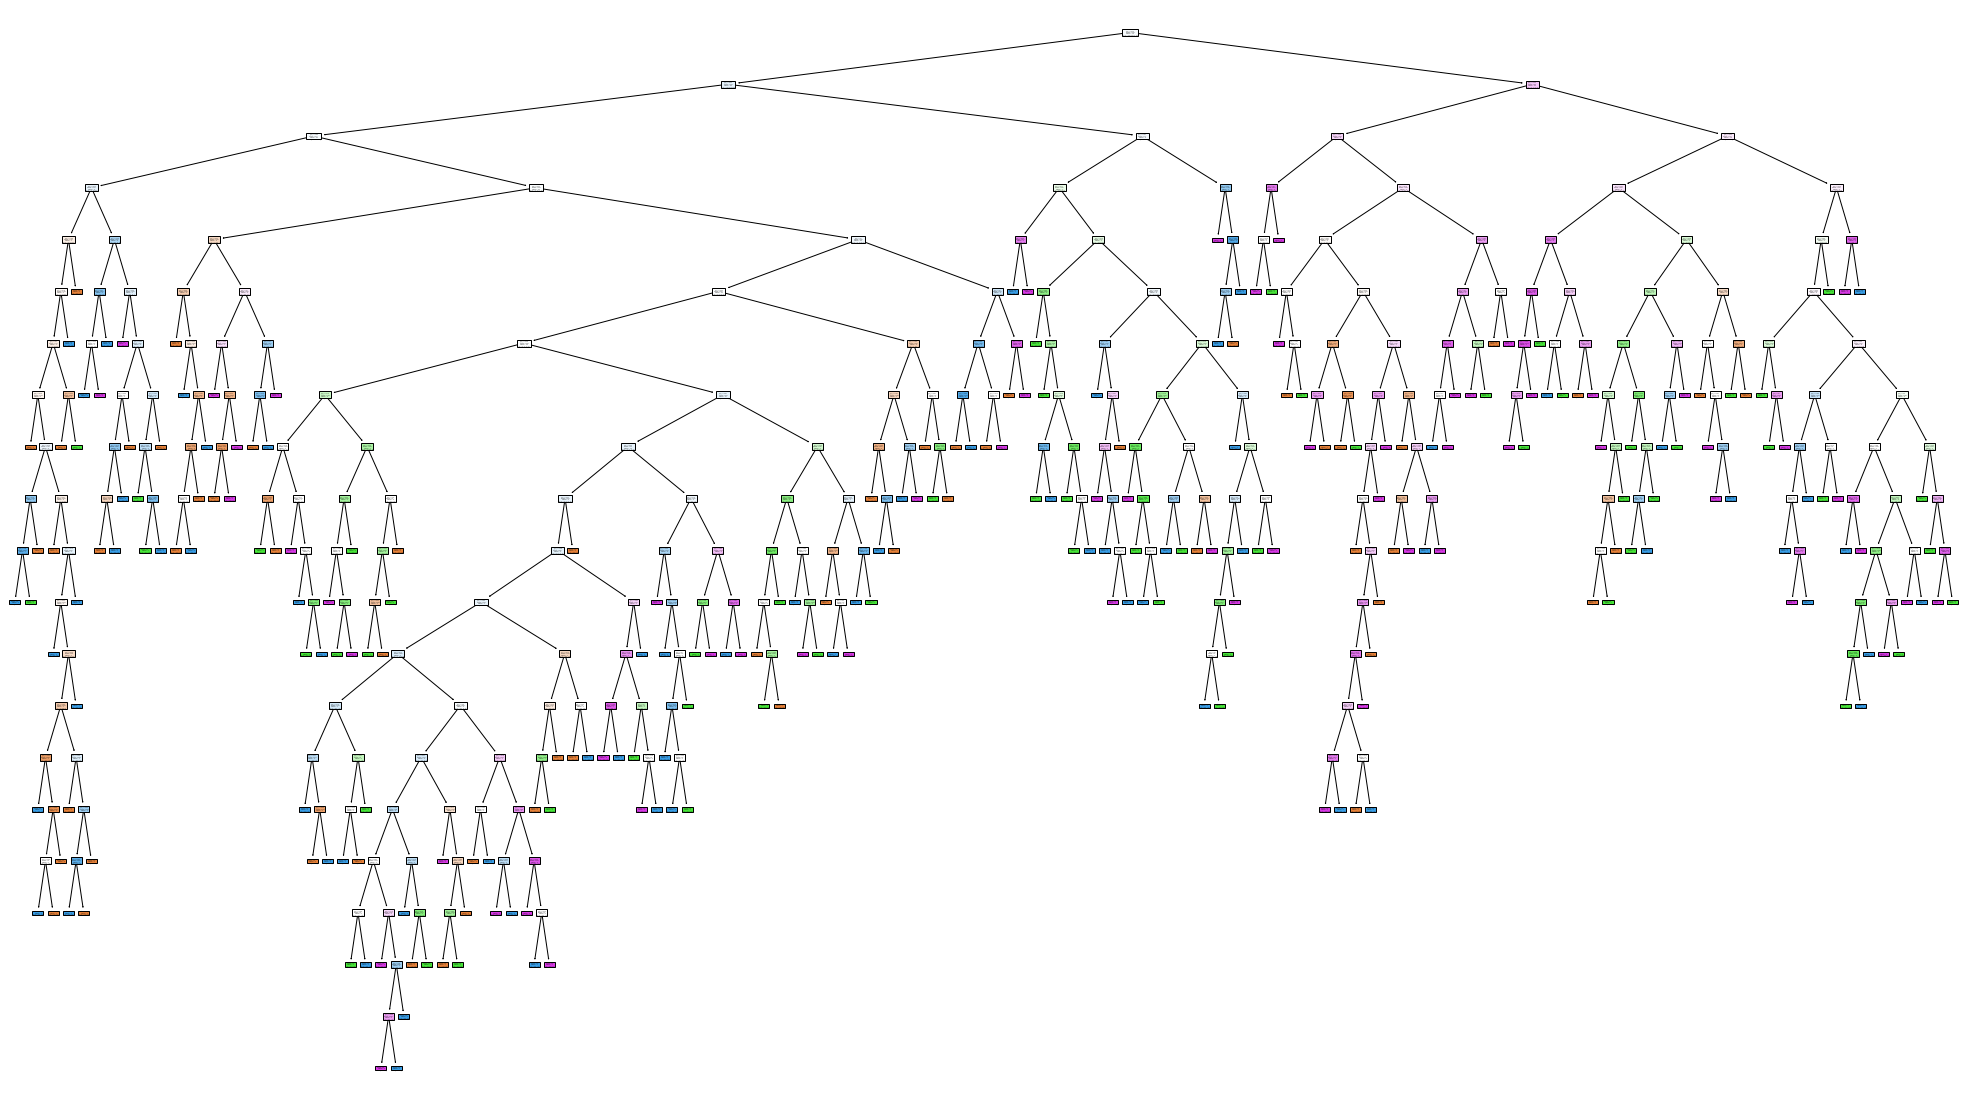

In [13]:
plt.figure(figsize = (35,20))
tree.plot_tree(obj, filled = True)

In [14]:
pred = obj.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(Y_test,pred)

0.33

In [17]:
accuracy_score(Y_train,obj.predict(X_train))

1.0

# SVM

In [62]:
from sklearn import preprocessing

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.4, random_state=4)

In [64]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [65]:
pred = clf.predict(X_test)

In [66]:
accuracy_score(Y_test,pred)

0.2525

In [67]:
accuracy_score(Y_train,clf.predict(X_train))

0.255

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
m = RandomForestClassifier(n_estimators=50)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.4, random_state=4)

In [59]:
m.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [60]:
m.score(X_test, y_test)

0.3925

In [61]:
m.score(X_train, y_train)

1.0

# Ada Boost

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.4, random_state=4)

In [70]:
n = AdaBoostClassifier(base_estimator=None, n_estimators=200)

In [71]:
n.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [72]:
n.score(X_test, y_test)

0.3625

In [73]:
n.score(X_train, y_train)

0.48